# 1. Салангид хувьсагч

## 1.1 Нэг хэмжээст салангид санамсаргүй хувьсагч 

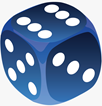

тэгш бус хөндийн төвтэй 1 ширхэг шоо

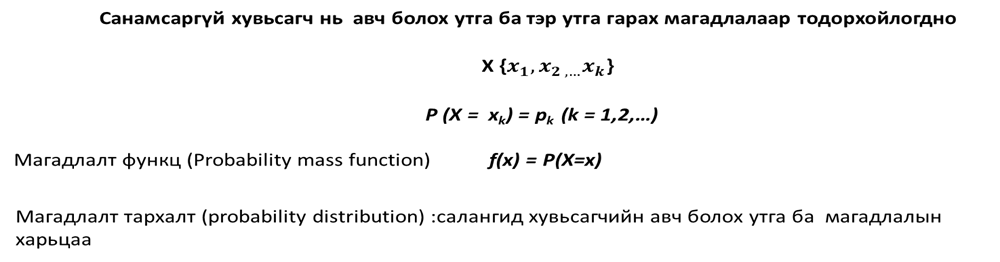

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3

'%.3f'

### 1.1.1 Нэг хэмжээст салангид санамсаргүй хувьсагчийн тархалтын тодорхойлолт

In [2]:
#тэгш  бус хүндийн төвтэй шооны бууж болох утгууд
x_set = np.array([1, 2, 3, 4, 5, 6])

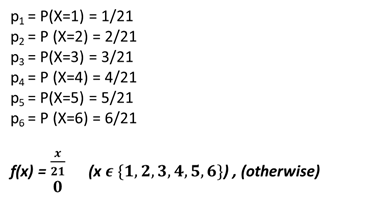

In [3]:
# шооны нүд тус бүрийн  буух магадлал
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
# магадлалт тархалттай шоо гэсэн санамсаргүй хувьсагч
X = [x_set, f]

In [5]:
# P_k магадлалыг ол
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

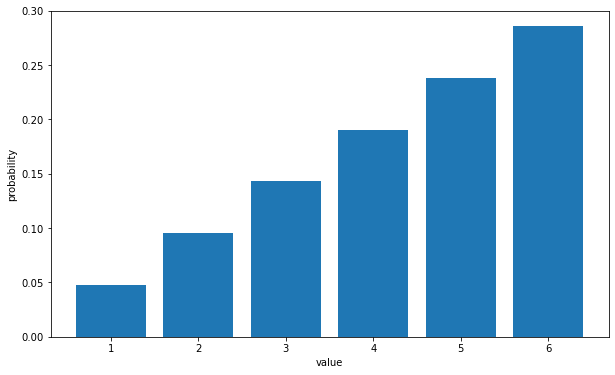

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

#### 1.1.1.1 Магадлалын хэв шинж
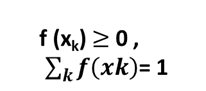

In [7]:
np.all(prob >= 0)

True

In [8]:
np.sum(prob)

0.9999999999999999

#### 1.1.1.2 Cumulative distribution function

зөвхөн тодорхой утга дээр магадлалыг гаргахгүйгээр
шооны нүд тэдээс бага үед магадлалыг гаргадаг функц авч үзий

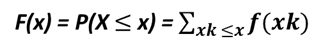

In [9]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
F(3)

0.2857142857142857

#### 1.1.1.3 санамсаргүй  хувьсагчийн хувиргалт

санамаргүй хувьсагчийн өөрчлөлт гэдэг нь санамсаргүй хувьсагч x - ийг өөр y - гэсэн хувьсагч руу хувиргахыг хэлнэ

2 X + 3 = Y гэж үзэх юм бол

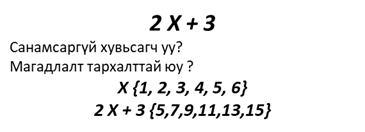

In [11]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 1.1.2 нэг хэмжээст салангид санамсаргүй  хувьсагчийн үзүүлэлт

#### 1.1.2.1 Хүлээгдэж буй утга (expected value) 

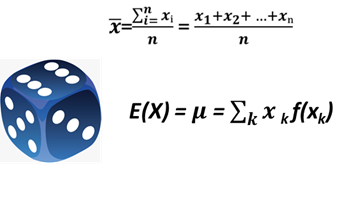

In [12]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
# 10 6 zereg 10say udaa shidehed hvleegdej bui utga
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.333025

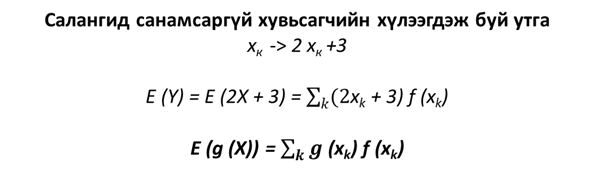

In [14]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [15]:
# Х 
E(X)

4.333333333333333

In [16]:
# Y =2X + 3 
E(X, g=lambda x: 2*x + 3)

11.666666666666664

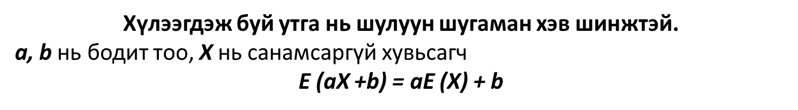

In [17]:
# E(2X + 3) = 2 * E(X) + 3 
2 * E(X) + 3

11.666666666666666

#### 1.1.2.2 вариац

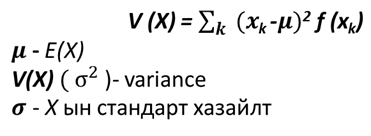

In [18]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

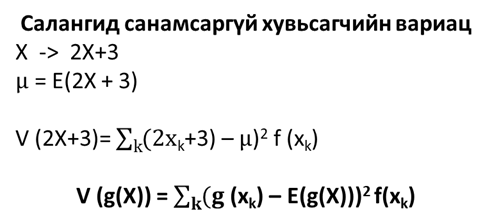

In [19]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [20]:
V(X)

2.2222222222222223

In [21]:
# Y =2X + 3 
V(X, lambda x: 2*x + 3)

8.88888888888889

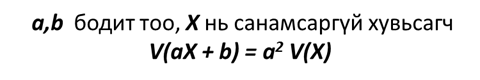

In [22]:
# V(2X+3) = 2**2 V(X) 
2**2 * V(X)

8.88888888888889

## 1.2 хоёр хэмжээст салангид магадлалт хувьсагч


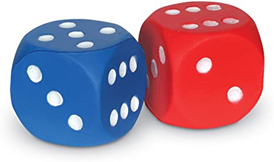

### 1.2.1 Хоёр хэмжээст салангид санамсаргүй хувьсагчийн тархалт

тэгш бус хөндийн төвтэй 2 шоо

#### 1.2.1.1 Хос магадлалт тархалт 

санамсаргүй хувьсагч X,Y -ийн өөрчлөлтийг нэг зэрэг тооцохыг хэлнэ.

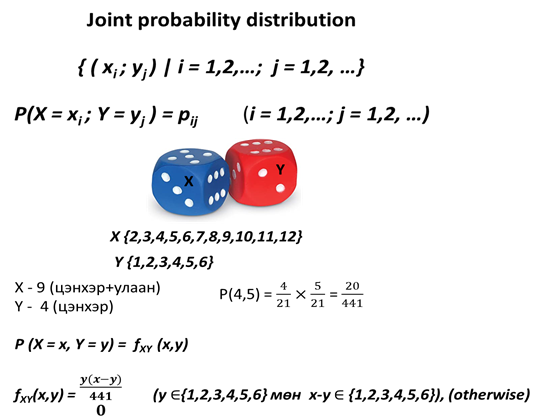

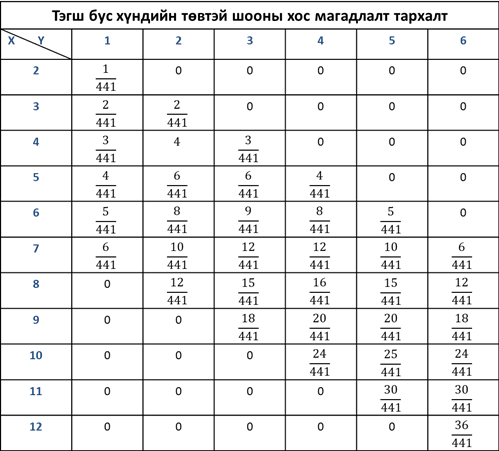

In [23]:
# Х ба Ү ын авч болох утгын хослол
x_set = np.arange(2, 13) # Х {2,3,4,5,6,7,8,9,10,11,12} 
y_set = np.arange(1, 7)   # Y {1,2,3,4,5,6}

In [24]:
# хос магадлалт функц 
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [55]:
XY = [x_set, y_set, f_XY]

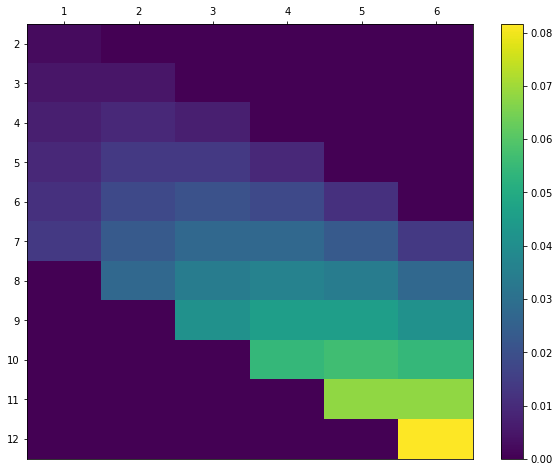

In [56]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# Y тэнхлэгийг буурах дарааллаар тоо болгож, дээд ба доод талыг эргүүл.
ax.invert_yaxis()
# Графикийн дээд талд x тэнхлэгийн хуваарийг харуул
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()
# Магадлал нэмэгдэх тусам цайрж байна.

#### 1.2.1.2 Магадлалын хэв шинж
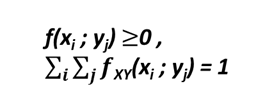

In [27]:
np.all(prob >= 0)

True

In [28]:
np.sum(prob)

1.0

#### 1.2.1.3 Marginal probability distribution

Магадлалын онол, статистикийн хувьд санамсаргүй хэмжигдэхүүний цуглуулгын дэд олонлогийн ахиу тархалт нь тухайн дэд олонлогт агуулагдах хувьсагчдын магадлалын тархалт юм. Энэ нь бусад хувьсагчдын утгуудыг ишлэлгүйгээр дэд олонлогийн хувьсагчдын янз бүрийн утгын магадлалыг өгдөг.

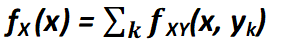

In [29]:
# Х ба Ү ын ахиу тархалтын функц
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [30]:
# Х ба Ү -г тус тус бие даасан буюу үл хамаарах хувьсагчаар
X = [x_set, f_X]
Y = [y_set, f_Y]

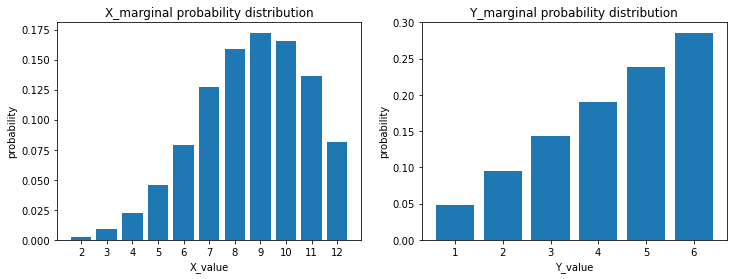

In [31]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [32]:
np.all(prob_x >= 0)

True

In [33]:
np.all(prob_y >= 0)

True

In [34]:
np.sum(prob_x)

0.9999999999999999

In [35]:
np.sum(prob_y)

0.9999999999999999

### 1.2.2 Хоёр хэмжээст салангид санамсаргүй хувьсагчийн үзүүлэлтүүд

#### 1.2.2.1 Expected value

Статистик болон магадлалын шинжилгээнд хүлээгдэж буй утгыг боломжит үр дүн тус бүрийг гарах магадлалаар үржүүлж, дараа нь эдгээр бүх утгыг нэгтгэн тооцдог. Хүлээгдэж буй утгыг тооцоолсноор хөрөнгө оруулагчид хүссэн үр дүнг өгөх хамгийн магадлалтай хувилбарыг сонгох боломжтой.

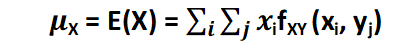

In [36]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [37]:
np.sum([y_j * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.333333333333333

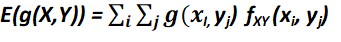

In [38]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [39]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [40]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

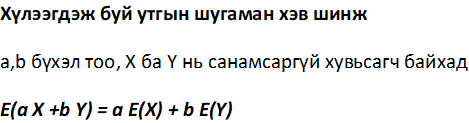

In [41]:
a, b = 2, 3

In [42]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [43]:
a * mean_X + b * mean_Y

30.333333333333332

####  1.2.2.2 вариац
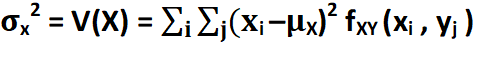

In [44]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [45]:
np.sum([(y_j-mean_Y)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

2.2222222222222223

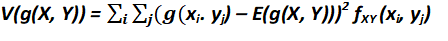

In [46]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [47]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [48]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.2222222222222223

#### 1.2.2.3 Сovariance
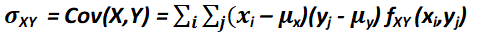

In [49]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [50]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

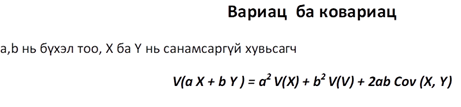

In [51]:
# V(2X + 3 Y) 
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [52]:
#4V(x) + 9V(Y) + 12 Cov(X, Y) 
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

#### 1.2.2.4 Correlation coefficient
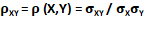

In [53]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474